In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
def read_data():
    data = pd.read_csv("D:/Topmentor/Oct/29th oct/b88assignments/Project - 1&2_ Simple_Reg/Project - 1&2_ Simple_Reg/delivery_time.csv")
    return data

In [5]:
df = read_data()
print(df.head())
print("---------------------------------")
print(df.info())

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None


In [6]:
df_copy = df.copy()
print(df_copy)

    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


In [7]:
df_copy['Sorting Time'].value_counts()

7     4
10    3
4     3
6     3
3     3
9     2
8     1
2     1
5     1
Name: Sorting Time, dtype: int64

In [8]:
df_sort = df_copy.sort_values(by='Sorting Time')

In [77]:
def exploratory_data_analysis():
    plt.figure(figsize = (8,5))
    sns.scatterplot( data = df_copy, x= 'Sorting Time', y='Delivery Time')
    plt.title("Scatter Plot of Sorting Time vs. Delivery Time")
    plt.show()
    print("Insights/Inference:")
    print("1.The dataset contains two columns, 'Delivery Time' and 'Sorting Time.'")
    print("2.From the scatter plot, it appears there is a positive linear relationship between Sorting Time and Delivery Time. As Sorting Time increases, Delivery Time tends to increase.")
    plt.savefig('D:/Topmentor/Oct/29th oct/Delivery project/delivery_scat.png')


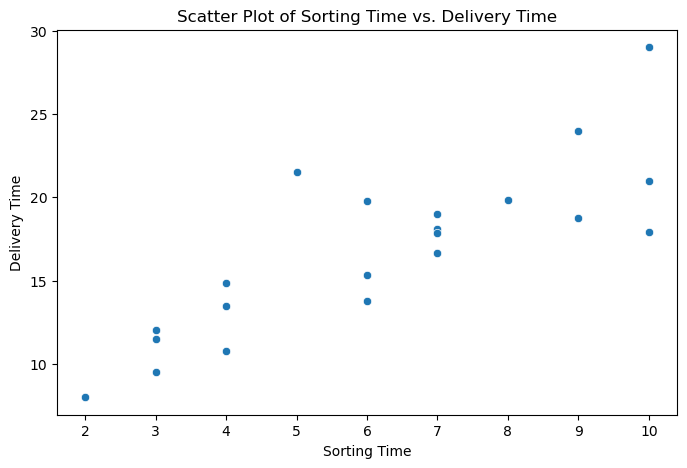

Insights/Inference:
1.The dataset contains two columns, 'Delivery Time' and 'Sorting Time.'
2.From the scatter plot, it appears there is a positive linear relationship between Sorting Time and Delivery Time. As Sorting Time increases, Delivery Time tends to increase.
None


<Figure size 640x480 with 0 Axes>

In [78]:
eda = exploratory_data_analysis()
print(eda)

In [11]:
def summary_statistics():
    plt.figure(figsize = (10,3),edgecolor= 'blue')
    sns.displot(df_copy)
    print(df_copy.skew())
    print(df_copy.describe())
    print("__________________________________")
    print("Summary statistics provide an overview of the data, including the mean, standard deviation, and quartiles for both variables.")

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64
       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000
__________________________________
Summary statistics provide an overview of the data, including the mean, standard deviation, and quartiles for both variables.
None


<Figure size 1000x300 with 0 Axes>

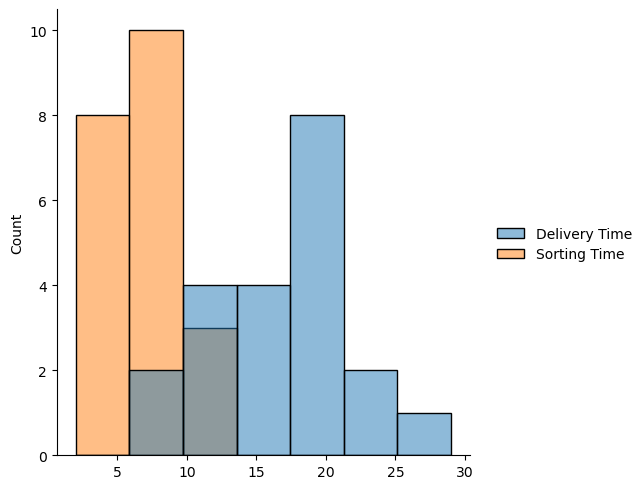

In [12]:
sum_statistics = summary_statistics()
print(sum_statistics)

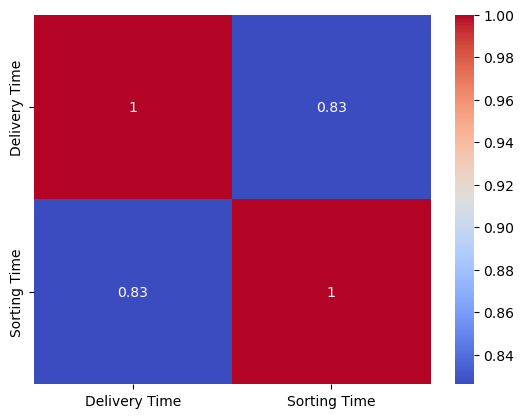

In [45]:
#Correlation Heatmap
correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [13]:
def data_preprocessing_transformation():
    print(df_copy.isnull().sum())

In [14]:
dpt=data_preprocessing_transformation()
print(dpt)

Delivery Time    0
Sorting Time     0
dtype: int64
None


In [98]:
## Now  Model Building
def model_building():
    df_copy.shape
    X= df_copy['Sorting Time']   
    y=df_copy['Delivery Time']
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)
    X_train.shape,y_train.shape
    X_test.shape,y_test.shape
    X_train = X_train.values.reshape(-1,1)
    y_train = y_train.values.reshape(-1,1)
    
    model = LinearRegression()
    model_fit = model.fit(X_train,y_train)
    coef= model_fit.coef_
    intercept=model_fit.intercept_
    
    X_test = X_test.values.reshape(-1,1)
    
    y_pred = model_fit.predict(X_test)
    print("The Predicted values:\n", np.round(y_pred,2))
   
    #Model evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("                     ")
    print("Coefficients:", np.round(coef,2))
    print("Intercept:",np.round(intercept,2))
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')

In [99]:
dmb= model_building()
print(dmb)

The Predicted values:
 [[23.08]
 [18.35]
 [13.63]
 [13.63]
 [23.08]
 [16.78]
 [13.63]
 [21.5 ]
 [10.48]
 [16.78]
 [12.05]
 [16.78]
 [21.5 ]
 [15.2 ]
 [23.08]
 [18.35]
 [12.05]]
                     
Coefficients: [[1.57]]
Intercept: [7.33]
Mean Squared Error: 9.73
R-squared: 0.65
None


<Figure size 640x480 with 0 Axes>

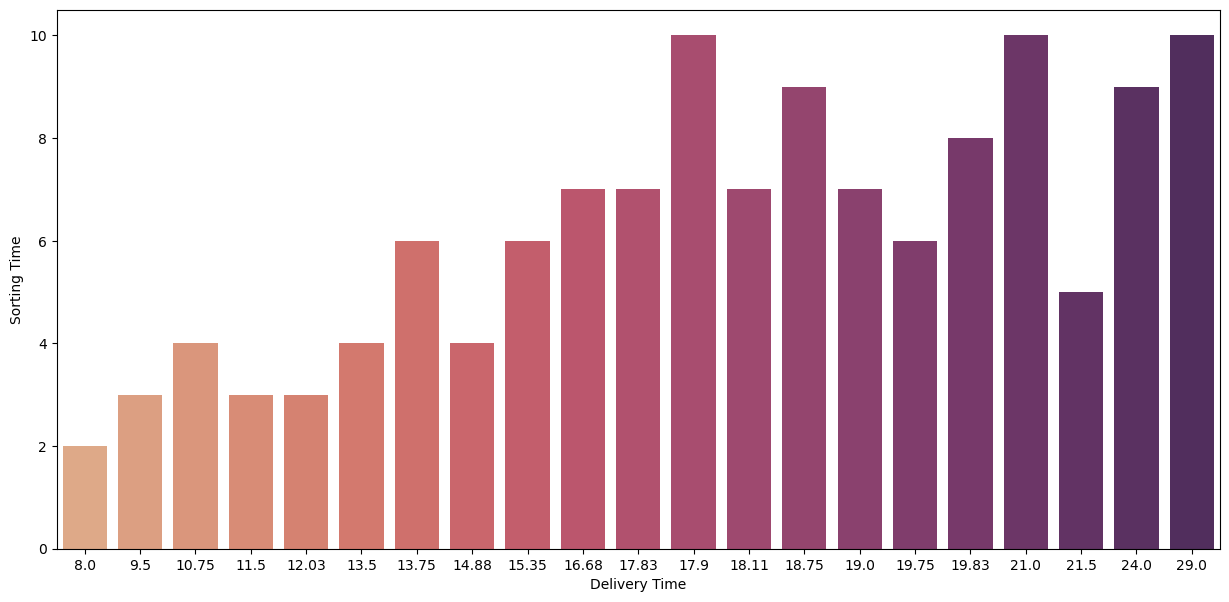

In [97]:
# Save pairplot
plt.figure()
plt.figure(figsize = (15,7))
sns.barplot( data = df_copy, x= 'Delivery Time', y='Sorting Time',palette="flare")
plt.savefig('D:/Topmentor/Oct/29th oct/Delivery project/delivery_pairplot.png')

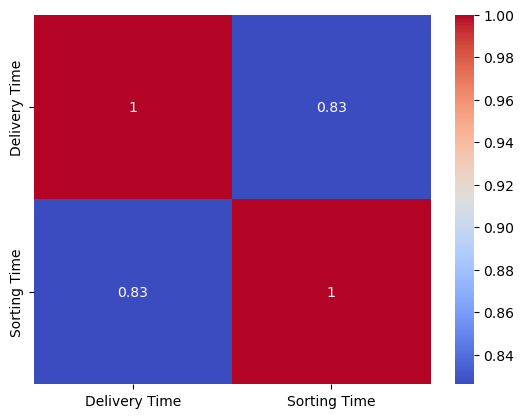

In [82]:
# Save correlation heatmap
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.savefig('D:/Topmentor/Oct/29th oct/Delivery project/delivery_correlation_heatmap.png')
